В период с  2011-01-01  по  2021-09-29
(всего:  3924 days, 0:00:00 )

Прогноз:
В рублях:   1,290,000 р
RUB + хэдж: 1,512,422 р
USD only:   1,774,816 р
EUR only:   1,722,898 р


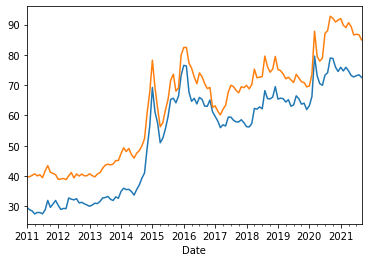

In [106]:
import yfinance as yf
from datetime import datetime

start = '2011-01-01'
end = '2021-09-29'

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1))

usdrub = yf.download('USDRUB=X', start,end, interval='1mo',progress=False)
eurrub = yf.download('EURRUB=X', start,end, interval='1mo',progress=False)

usdrub.Close.plot()
eurrub.Close.plot()

usdraw = usdrub.Close.array
eurraw = eurrub.Close.array

rub_balance = 0
usd_balance = 0
eur_balance = 0

eur_only_balance=0
usd_only_balance=0

spread = 5 ##комиссия

earning = 10000 ## Доход в рублях
salary = earning
index = salary/3

for i in range(len(usdraw)):
    rub_balance+= index
    salary=salary-salary/3

    usd_balance+= index / (usdraw[i] + spread)
    salary=salary-salary/3

    usd_balance+= index / (eurraw[i] + spread)
    salary=salary-salary/3

    eur_only_balance+=earning / (eurraw[i] + spread)
    usd_only_balance+=earning / (usdraw[i] + spread)

final_balance = rub_balance + usd_balance * usdraw[-1] + eur_balance * eurraw[-1]

print('В период с ',start, ' по ', end)
print("(всего: ", days_between(end, start), ')')
print()
print("Прогноз:")
print('В рублях:  ',"{:,}".format(earning*len(usdraw)), 'р')
print('RUB + хэдж:',"{:,}".format(int(final_balance)), 'р')
print('USD only:  ',"{:,}".format(int(usd_only_balance * usdraw[-1])), 'р')
print('EUR only:  ',"{:,}".format(int(eur_only_balance * eurraw[-1])), 'р')